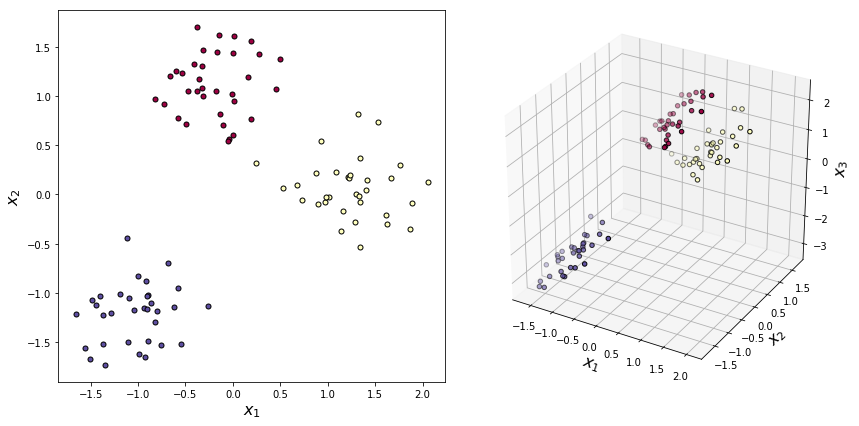

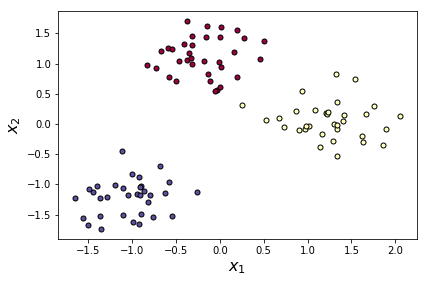

In [46]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
import time
import sys
#plt.ion()
import pdb
n_clusters=3
n_labels=3
%matplotlib inline 
std=2

# Black removed and is used for noise instead.
def plot_clusters(labels, clusters, X,i, inertia,init=False):
  
  h = plt.figure()
#   plt.clf()
  unique_labels = set(labels)
  colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


  #print('colors:',colors)
  for k, col in zip(unique_labels, colors):
    #print('k:',k,'col:',col)
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
   
    
    if clusters is None:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(1,1,1,1),
             markeredgecolor='k', markersize=5, alpha=0.5)
    else:
        if init:
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(1,1,1,1),
         markeredgecolor='k', markersize=5, alpha=0.5)
        else:
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=5, alpha=0.5)
  if clusters is not None:
      colors2 = plt.cm.Spectral(np.linspace(0, 1, len(clusters)))
      for k, col in zip(np.arange(len(clusters)), colors2):
            plt.plot(clusters[k,0],clusters[k,1],'o',markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=20,alpha=0.5)
  plt.xlabel('$x_1$',size=16) 
  plt.ylabel('$x_2$',size=16)
  if init:
      plt.title('Initial Centers')  
      h.tight_layout()
      h.savefig('kmeans_init.pdf')
  elif clusters is None:
      plt.title('Data')
      h.tight_layout()
      h.savefig('kmeans_data.pdf')
  else:
      plt.title('Iteration: %d, Total Inertia %.2f'%(i,inertia))  
      h.tight_layout()
      h.savefig('kmeans_'+str(i)+'.pdf')
##############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]

X, labels_true = make_blobs(n_samples=100, centers=n_clusters, cluster_std=std, random_state=42)
X = StandardScaler().fit_transform(X)

h = plt.figure(figsize=(12,6))
ax2 = h.add_subplot(121)
ax = h.add_subplot(122, projection='3d')
h2 = plt.figure()
axd = h2.add_subplot(111)
colors = plt.cm.Spectral(np.linspace(0, 1, len(np.unique(labels_true))))
for k, col in zip(np.unique(labels_true), colors):
    #print('k:',k,'col:',col)
    class_member_mask = (labels_true == k)
    xy = X[class_member_mask]
    ax.scatter(xy[:,0],xy[:,1],xy[:,0]+xy[:,1],c=tuple(col),edgecolor='k')
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=5)
    axd.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=5)
ax.set_xlabel('$x_1$',size=16)
ax.set_ylabel('$x_2$',size=16)
ax.set_zlabel('$x_3$',size=16) 
ax2.set_xlabel('$x_1$',size=16)
ax2.set_ylabel('$x_2$',size=16)
ax.view_init(azim=-60,elev=30)
h.tight_layout()
h.savefig('data_3d_embedding.pdf')
axd.set_xlabel('$x_1$',size=16)
axd.set_ylabel('$x_2$',size=16)
h2.tight_layout()
h2.savefig('labelled_data.pdf')
plt.show()


(100,)
(100, 2)
explained variance: [ 2.37031112  0.62968888]
explained_variance_ratio [ 0.79010371  0.20989629]
total explained variance: 1.0


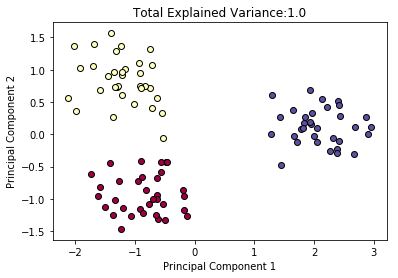

In [43]:


##############################################################################
# Compute PCA
print((X[:,0]+X[:,1]).shape)
print(X.shape)

X3 = StandardScaler().fit_transform(np.hstack((X,(X[:,0]+X[:,1]).reshape(-1,1))))
pca = PCA(n_components=2).fit(X3)

print('explained variance:',pca.explained_variance_)
print('explained_variance_ratio',pca.explained_variance_ratio_)
print('total explained variance:',np.sum(pca.explained_variance_ratio_))
h = plt.figure()

for k, col in zip(np.unique(labels_true), colors):
    #print('k:',k,'col:',col)
    class_member_mask = (labels_true == k)
    xy = pca.transform(X3[class_member_mask])
    plt.scatter(xy[:,0],xy[:,1],c=tuple(col),edgecolor='k')
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Total Explained Variance:'+str(np.sum(pca.explained_variance_ratio_)))
h.savefig('pca_reduction.pdf')
plt.show()

In [ ]:
# generate example data

import numpy as np
from sklearn.datasets.samples_generator import make_blobs
n_clusters = 3

X, labels = make_blobs(n_samples=100, centers=n_clusters, cluster_std=std,random_state=0)

for i in range(100):
    m = KMeans(n_clusters=n_clusters, n_init=1,init='random',max_iter=1).fit(X)